# Gaussian Beams

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
E_0 = 1. #amplitudinea campului electric
w_0 = 1. #largimea fasciculului Gaussian
z_0 = 3.14 #distanta Rayleigh * > 0
k = 2*np.pi #nr de unda

w = lambda z: w_0*np.sqrt(1 + (z/z_0)**2)
R = lambda z: z*(1 + (z_0/z)**2)
c_phase_factor = lambda x, y, z: np.exp(-1j*(k*z - np.arctan(z/z_0) + k*(x**2 + y**2)/(2*R(z))))
E_00 = lambda x, y, z: E_0*w_0/w(z)*np.exp(-(x**2 + y**2)/w(z)**2)*c_phase_factor(x, y, z)
I = lambda x, y, z: np.abs(E_0*w_0/w(z)*np.exp(-(x**2 + y**2)/w(z)**2))**2

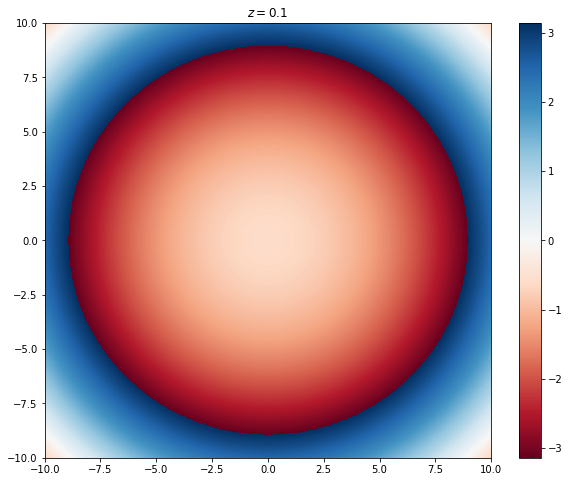

In [3]:
def transversal_phase_plotter(z_plane):

    # generate 2 2d grids for the x & y bounds
    y, x = np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000))

    c_phase = c_phase_factor(x, y, z_plane);theta = np.angle(c_phase)
    # x and y are bounds, so theta should be the value *inside* those bounds.
    # Therefore, remove the last value from the theta array.
    theta = theta[:-1, :-1]

    fig = plt.figure(figsize = (10, 8))

    plt.pcolormesh(x, y, theta, cmap='RdBu', vmin=-np.pi, vmax=np.pi)
    plt.title(f'$z = {z_plane}$')

    fig.colorbar(plt.pcolormesh(x, y, theta, cmap='RdBu', vmin=-np.pi, vmax=np.pi))
    plt.show()

transversal_phase_plotter(0.1)



In [4]:
def Intenstiy_Snapshot():

    z, x = np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-5, 5, 1000))

    Intensity = np.real(E_00(x, 0, z))**2; Intensity = Intensity[:-1, :-1]

    fig = plt.figure(figsize = (12, 6))

    plt.pcolormesh(z, x, Intensity, cmap='hot', vmin=Intensity.min(), vmax=Intensity.max())
    plt.xlabel("Longitudinal distance $z (\mu m)$", fontsize = 15)
    plt.ylabel("Radial distance $r_{T} (\mu m)$", fontsize = 15)


    plt.title(f'Intensity Snapshot $\lambda_{0} = \mu 1 m$')

    fig.colorbar(plt.pcolormesh(z, x, Intensity, cmap='hot', vmin=Intensity.min(), vmax=Intensity.max()))
    plt.show()

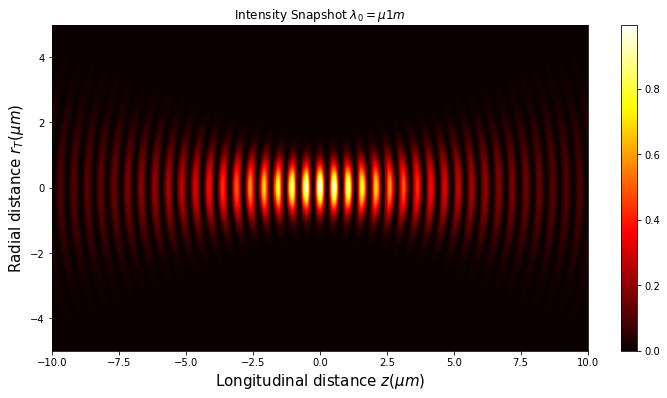

In [5]:
Intenstiy_Snapshot()

#  Higher-Order Hermite-Gaussian Beams 

In [3]:
from scipy import special

In [4]:
H = lambda n, x: special.hermite(n, monic = True)(x)
L = lambda p, m, x: special.genlaguerre(p, m, monic = False)(x)

In [5]:
def E_HG(m, p, x, y, z):
    """
    Electric Hermite Gaussian field 
    """
    E_0 = 1.5
    
    rad_phase = lambda x, y, z: np.exp(-1j*k*(x**2 + y**2)/(2*R(z)))
    long_phase = lambda z: np.exp(-1j*k*z - (1 + m + p)*np.arctan(z/z_0))
    
    return E_0*H(m, np.sqrt(2)*x/w(z))*H(p, np.sqrt(2)*y/w(z))*w_0/w(z)*np.exp(-(x**2 + y**2)/w(z)**2)*rad_phase(x, y, z)*long_phase(z)


In [44]:
def Intensity_Diagram_HG(m, p, z):
    """
    Draw intensity diagram of TEM_mp 
    at specific z, z being longitudinal distance
    z cannot be 0,
    m, p = 0, 1, 2, ...
    """
    y, x = np.meshgrid(np.linspace(-4, 4, 1000), np.linspace(-4, 4, 1000))

    I = np.real(E_HG(m, p, x, y, z))**2; I = I[:-1, :-1]

    #fig = plt.figure(figsize = (10, 8))

    c = ax.pcolormesh(x, y, I, cmap='hot', vmin=I.min(), vmax=I.max())
    #ax.set_xlabel("$x$", fontsize = 16)
    #ax.set_ylabel("$y$", fontsize = 16)
    
    if z < 0.1:
        z = 0
    s = f"{m}{p}"
    ax.set_title(f"TEM{s}")

    #fig.colorbar(c)
    #plt.show()

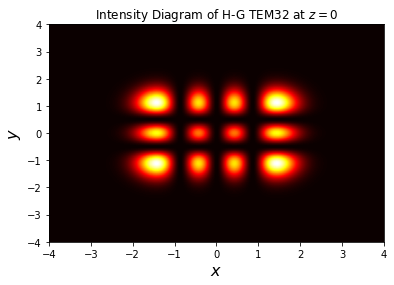

In [11]:
Intensity_Diagram_HG(3, 2, 0.001)

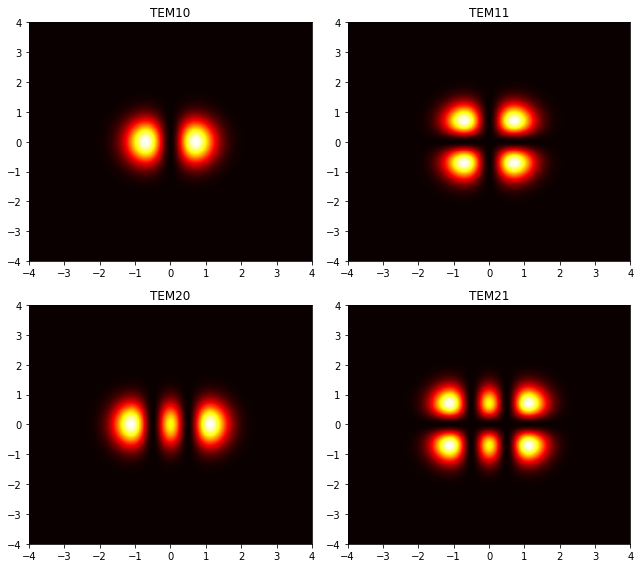

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(9,8))
ax = axes[0][0]
Intensity_Diagram_HG(1, 0, 0.001)

ax = axes[0][1]
Intensity_Diagram_HG(1, 1, 0.001)

ax = axes[1][0]
Intensity_Diagram_HG(2, 0, 0.001)

ax = axes[1][1]
Intensity_Diagram_HG(2, 1, 0.001)

fig.tight_layout()

plt.savefig('TEMs.png', dpi=200)
plt.show()

In [36]:
def E_LG(p, m, x, y, z):
    """
    Electric Laguerre Gaussian field 
    """
    E_0 = 1.5
    
    fi = lambda x, y: np.arctan2(y, x)
    r = lambda x, y: np.sqrt(x**2 + y**2)
    
    rad_phase = lambda x, y, z: np.exp(-1j*k*(x**2 + y**2)/(2*R(z)))
    azimutal_phase = lambda fi: np.exp(1j*m*fi)#np.cos(m*fi) np.exp(1j*m*fi)
    long_phase = lambda z: np.exp(-1j*(k*z - (1 + np.abs(m) + 2*p)*np.arctan(z/z_0)))
    
    return E_0*w_0/w(z)*(np.sqrt(2)*r(x, y)/w(z))**np.abs(m)*L(p, np.abs(m), 2*r(x,y)**2/w(z)**2)*np.exp(-(x**2 + y**2)/w(z)**2)*long_phase(z)*azimutal_phase(fi(x, y))*rad_phase(x, y, z)

In [42]:
def Intensity_Diagram_LG(p, m, z):
    """
    Draw intensity diagram of TEM_mp 
    at specific z, z being longitudinal distance
    z cannot be 0,
    p = 0, 1, 2, ...
    m = 0, +-1, +-2, +-3,...
    """
    y, x = np.meshgrid(np.linspace(-4, 4, 1000), np.linspace(-4, 4, 1000))

    I = np.real(E_LG(p, m, x, y, z))**2; I = I[:-1, :-1]

    #fig = plt.figure(figsize = (10, 8))

    c = ax.pcolormesh(x, y, I, cmap='hot', vmin=I.min(), vmax=I.max())
    #ax.set_xlabel("$x$", fontsize = 16)
    #ax.set_ylabel("$y$", fontsize = 16)
    
    if z < 0.1:
        z = 0
    s = f"{p}{m}"
    ax.set_title(f"L-G TEM{s}")

    #fig.colorbar(c)
    #plt.show()

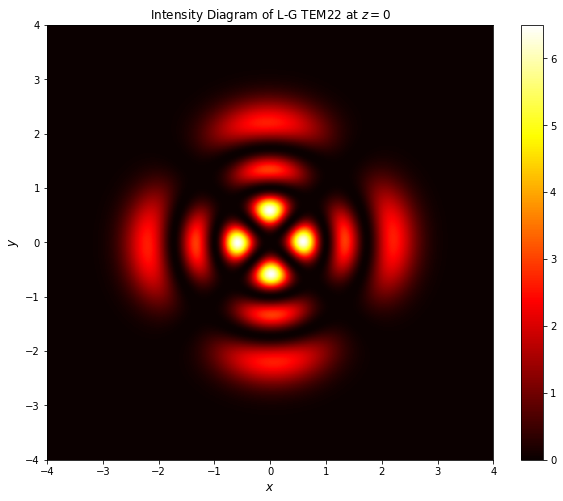

In [38]:
Intensity_Diagram_LG(2, 2, 0.01)

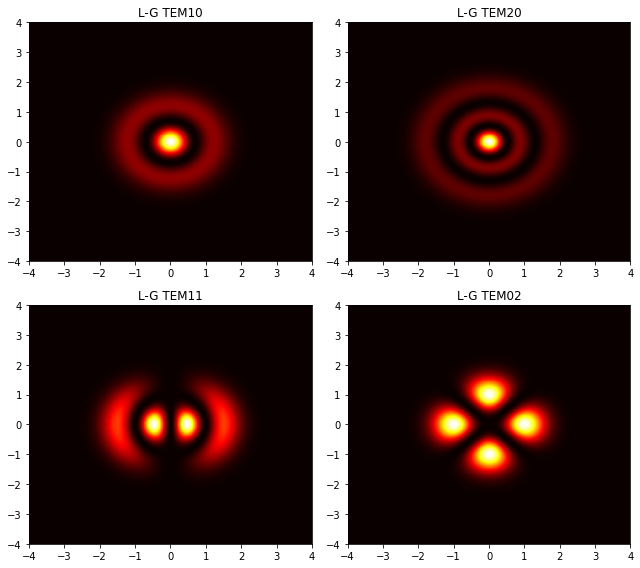

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(9,8))
ax = axes[0][0]
Intensity_Diagram_LG(1, 0, 0.001)

ax = axes[0][1]
Intensity_Diagram_LG(2, 0, 0.001)

ax = axes[1][0]
Intensity_Diagram_LG(1, 1, 0.001)

ax = axes[1][1]
Intensity_Diagram_LG(0, 2, 0.001)

fig.tight_layout()

#plt.savefig('L-G_TEMs.png', dpi=200)
plt.show()

# Orbital angular momentum

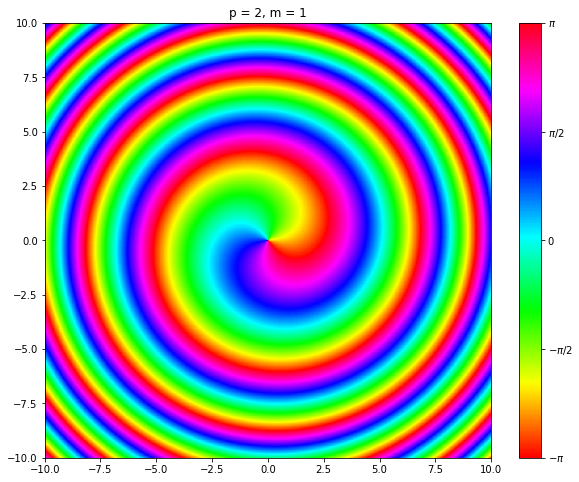

In [40]:
 def transversal_phase_plotter_LG(p, m, z):

    # generate 2 2d grids for the x & y bounds
    y, x = np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000))
    
    fi = lambda x, y: np.arctan2(y, x)
    r = lambda x, y: np.sqrt(x**2 + y**2)
    
    rad_phase = lambda x, y, z: np.exp(-1j*k*(x**2 + y**2)/(2*R(z)))
    azimutal_phase = lambda fi: np.exp(1j**m*fi) #np.sin(m*fi)
    long_phase = lambda z: np.exp(-1j*(k*z - (1 + np.abs(m) + 2*p)*np.arctan(z/z_0)))
    
    c_phase = long_phase(z)*azimutal_phase(fi(x, y))*rad_phase(x, y, z); theta = np.angle(c_phase)
    # x and y are bounds, so theta should be the value *inside* those bounds.
    # Therefore, remove the last value from the theta array.
    theta = theta[:-1, :-1]

    fig = plt.figure(figsize = (10, 8))

    plt.pcolormesh(x, y, theta, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    plt.title(f"p = {p}, m = {m}")

    cbar = fig.colorbar(plt.pcolormesh(x, y, theta, cmap='hsv', vmin=-np.pi, vmax=np.pi))
    cbar.set_ticks([-np.pi,-np.pi/2, 0, np.pi/2, np.pi])
    cbar.set_ticklabels(["$-\pi$","$-\pi/2$", "0", "$\pi/2$", "$\pi$"])
    #plt.savefig('trans_phase', dpi=200)
    plt.show()

transversal_phase_plotter_LG(2, 1, 0.5) 


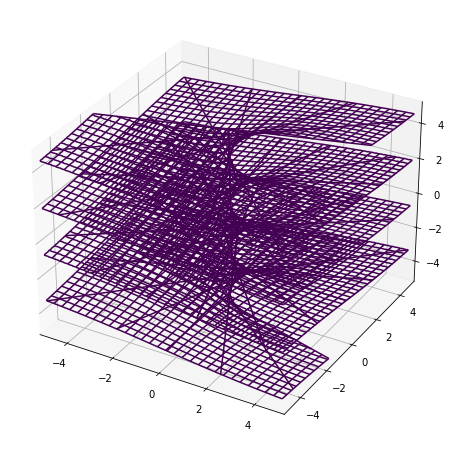

In [41]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def fun(x, y, z):
    
    p = 0. ; m = 1.
    k = 1.2;
       
    fi = lambda x, y: np.arctan2(y, x)
    
    azimutal_phase = lambda fi: np.exp(1j*m*fi)
    return np.angle(azimutal_phase(fi(x, y))*np.exp(1j*k*z)) 
    


def plot_implicit(fn, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 500) # resolution of the contour
    B = np.linspace(xmin, xmax, 30) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
    #ax.view_init(azim=80)

    #plt.savefig('wave_front_p0m1.png', dpi=200)
    plt.show()

plot_implicit(fun, bbox = (-5., 5.))



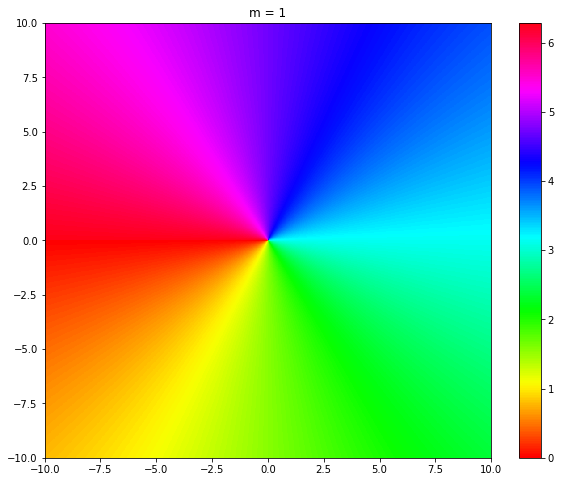

In [24]:
 def transversal_phase_plotter(m):

    # generate 2 2d grids for the x & y bounds
    y, x = np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000))
    
    fi = lambda x, y: np.arctan2(y, x)
    azimutal_phase = lambda fi: np.exp(1j*m*fi)
    
    
    theta = np.angle(azimutal_phase(fi(x, y))) + np.pi
    # x and y are bounds, so theta should be the value *inside* those bounds.
    # Therefore, remove the last value from the theta array.
    theta = theta[:-1, :-1]

    fig = plt.figure(figsize = (10, 8))

    plt.pcolormesh(x, y, theta, cmap='hsv', vmin=0, vmax=2*np.pi)
    plt.title(f"m = {m}")

    fig.colorbar(plt.pcolormesh(x, y, theta, cmap='hsv', vmin=0., vmax=2*np.pi))
    plt.show()

transversal_phase_plotter(1)

# Numerical Aplication

In [6]:
import numpy as np 
import scipy.integrate as integrate
import scipy.special as special

#unuitati atomice: m = 1, e = -1, 
#epsilon_0 = 1
n = np.array([1, 0, 0, 1]) #4vector
omega = 0.057 #u. a = 800nm 
c = 137.036 #u.a lungime / u.a timp
k = omega / c * n #vectorul de unda
xi = 0.5 #xi = eA0/(mc)
A0 = xi * c #potential vector (Lucram in etalonare Coulomb)
E0 = omega * A0 #din definitia E = -pd/pdt A
B0 = E0 / c #din E = c*B pt unde plane
T = 2 *  np.pi / omega
la = c * T #lungimea de unda


def fp(n_arg, x_arg): #4 produsu scalar
    return n_arg[0] * x_arg[0] - n_arg[1] * x_arg[1] - n_arg[2] * x_arg[2] - n_arg[3] * x_arg[3] 


def field(x,y,z,t):
    x_vec = np.array([c * t, x, y, z]) #4vector x
    Ex = E0 * np.sin(fp(x_vec, k))
    Ey = 0
    Ez = 0
    Bx = 0
    By = Ex / c
    Bz = 0
    return np.array([Ex, Ey, Ez]), np.array([Bx, By, Bz])



def w0(x, y, z ,t): #densitatea de energie
    (E, B) = field(x, y, z, t)
    return 0.5 * (np.dot(E,E) + c * c * np.dot(B,B))


    

x1 = -la #limitele cutiei
x2 = la
y1 = -la
y2 = la
z1 = -la  
z2 = la  

t = T / 4 #timpul la care calculam 
dens_de_energie = integrate.tplquad(lambda z,y,x:w0(x,y,z,t), x1, x2, y1, y2, z1, z2)[0] / ( 8 * la**3)
print(dens_de_energie)


7.626566668337998


## My implementation

$E_h = \frac{\hbar^2}{m_e a_0^2}$ - energia atomica 

$E_0 = \frac{E_h}{e a_0}$ - "campul electric atomic"

$B_0 = \frac{1}{c} E_0$ - "campul magnetic atomic" (definit functie de $E_0$)

$t_0 = \frac{\hbar}{E_h}$ - timp atomic $\rightarrow$ $\nu_0 = \frac{1}{t_0}$ - frecventa atomica

$v_0 = 10 \  \alpha c$ - 10 viteze atomice 
$r_0 = a_0$ distanta atomica = raza Bohr

$\tilde{\boldsymbol{S}} = const. \ \tilde{\boldsymbol{E}} \times \tilde{\boldsymbol{B}}$, $S_0 = \frac{E_h}{t a_0^2} \rightarrow const. \approx 10.9 $

$\tilde{\boldsymbol{g}} =  \tilde{\boldsymbol{E}} \times \tilde{\boldsymbol{B}} = \frac{1}{const.} \tilde{\boldsymbol{S}} $, $g_0 = \frac{1}{c} \omega_0$

$\tilde{\boldsymbol{j}}^J =  \tilde{\boldsymbol{r}} \times \tilde{\boldsymbol{g}}$, $j^J_0 = a_0 g_0 =\frac{a_0 \omega_0}{c}$

$\tilde{\omega} = \frac{1}{2} (\tilde{\boldsymbol{E}}^2 + \tilde{\boldsymbol{B}}^2)$, $\omega_0 = \frac{1}{2} (\epsilon_0 E_0^2 + \frac{1}{\mu_0} B_0^2) = \epsilon_0 E_0^2$

$\tilde{T}_{ij} = \frac{1}{2} \tilde{E}^2 \delta_{ij} - E_i E_j + \frac{1}{2} \tilde{B}^2 \delta_{ij} - B_i B_j $, $T_0 = \epsilon_0 E_0^2 $

$\tilde{\mathcal{M}_{li}} = \epsilon_{ijk} \tilde{x_j} \tilde{T_{kl}}$, $\mathcal{M}_0 = a_0 T_0$

In [12]:
import numpy as np
import scipy.integrate as integrate

In [23]:
c = 13.7 # v0 ------- viteza luminii in vid
w = 2*np.pi*530e12 / (4.13e16) #nu_0------- (red light) pulsation
T = 2*np.pi / w # t_0 -------- perioada 
k_0 = 5.3e-11*137/(10*3e8*2.42e-17) # 1/a_0------ modulul vectorului de unda
k = np.array([0, 0, k_0]) #unda se propaga in direztia z
l = c * T / 10 #  a0 -------- lungimea de unda 


print(l)

106.7566037735849


In [15]:
def delta(i, j):
    """
    Kronecker delta
    """
    if i == j:
        return 1.
    else:
        return 0.

def field(r, t):
    """
    Function that returns
    (E, B) at time t at point r
    r = (x[0], x[1], x[2])
    """
    E = np.zeros(3); B = np.zeros(3)
    E[0] = np.cos(k@r - w*t)
    E[1] = 0
    E[2] = 0
    
    B[0] = 0
    B[1] = E[0]
    B[2] = 0
    return (E, B)

def S(r, t):
    """
    Poynting vector 
    """
    E = field(r, t)[0]; B = field(r, t)[1] 
    return 10.9*np.cross(E, B)

def g(r, t):
    """
    Linear momentum 
    density of EM field
    """
    E = field(r, t)[0]; B = field(r, t)[1] 
    return np.cross(E, B)

def j(r, t):
    """
    Angular momentum
    density of EM field
    """
    return np.cross(r, g(r, t))
    

def omega(r, t):
    """
    energy density 
    of EM field
    """
    E = field(r, t)[0]; B = field(r, t)[1] 
    return 1/2 * (np.dot(E, E) + np.dot(B, B))

def T_tens(r, t):
    """
    Stress EM tensor
    """
    E = field(r, t)[0]; B = field(r, t)[1]
    
    T = np.zeros((3, 3))
    
    for i in range(3):
        for j in range(3):
            T[i][j] = omega(r, t)*delta(i, j) - (E[i]*E[j] + B[i]*B[j])
    return T

def M_tens(r, t):
    """
    Angular momentum 
    flux density
    """
    return np.cross(r, T(r, t))

    
    

In [28]:
t = T

integrate.tplquad(lambda z,y,x : omega(np.array([x, y, z]),t), -l/2, l/2, -l/2, l/2, -l/2, l/2)[0]

554238.6032164472

In [4]:
t = 2.; r = np.array([1., 2., 3.])

M(r, t)

array([[ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 1.961728, -0.980864,  0.      ]])

## Electron in plane EM field

$\boldsymbol{F} = -e (\boldsymbol{E} + \boldsymbol{v} \times \boldsymbol{B}) \Leftrightarrow $

$-\frac{m}{e} \dot{v_i} = E_i + \epsilon_{ijk} v_j B_k$

$\dot{x_i} = v_i$

Dupa scalare:

$E_0 = \frac{E_h}{e a_0}$ - "campul electric atomic"

$B_0 = \frac{1}{c} E_0$ - "campul magnetic atomic" (definit functie de $E_0$)

$t_0 = \frac{\hbar}{E_h}$ - timp atomic

$v_0 = 10 \  \alpha c$ - 10 viteze atomice 

$r_0 = a_0$ distanta atomica = raza Bohr

$m_0$ = $m_e$ masa electronului
Avem:

$$\tilde{\dot{v_i}} =  - 1/K_1 (\tilde{E_i} + 10 \alpha \ \epsilon_{ijk} \tilde{v_j} \tilde{B_k} )$$, $K_1 \approx 5.89$

$$\tilde{\dot{x_i}} = K_2 \tilde{v_i}$$, $K_2 \approx 1.59$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.style.use(['science', 'notebook', 'grid'])

In [3]:
c = 13.7 # v0 ------- viteza luminii in vid
w = 2*np.pi*530e12 / (4.13e16) #nu_0------- (red light) pulsation 
k_0 = 5.3e-11*137/(10*3e8*2.42e-17) # 1/a_0------ modulul vectorului de unda
k = np.array([0, 0, k_0]) #unda se propaga in direztia z
alpha = 1/137

K_1 = 5.89; K_2 = 1.59

In [4]:
def field(t, r):
    """
    Function that returns
    (E, B) at time t at point r
    r = (x[0], x[1], x[2])
    """
    E = np.zeros(3); B = np.zeros(3)
    E[0] = np.cos(k@r - w*t)
    E[1] = 0
    E[2] = 0
    
    B[0] = 0
    B[1] = E[0]
    B[2] = 0
    return (E, B)

field(1., np.array([1, 2, 3]))

(array([0.97602611, 0.        , 0.        ]),
 array([0.        , 0.97602611, 0.        ]))

In [24]:
E = lambda t, r : field(t, r)[0]
B = lambda t, r : field(t, r)[1]

def dSdt(t, S):
    
    x1, x2, x3, v1, v2, v3  = S
    
    return [K_2 * v1,
            K_2 * v2,
            K_2 * v3,
            -1/K_1 * (E(t, np.array([x1, x2, x3]))[0] + 10*alpha*(v2*B(t, np.array([x1, x2, x3]))[2] - v3*B(t, np.array([x1, x2, x3]))[1])),
            -1/K_1 * (E(t, np.array([x1, x2, x3]))[1] - 10*alpha*(v1*B(t, np.array([x1, x2, x3]))[2] + v3*B(t, np.array([x1, x2, x3]))[0])),
            -1/K_1 * (E(t, np.array([x1, x2, x3]))[2] + 10*alpha*(v1*B(t, np.array([x1, x2, x3]))[1] - v2*B(t, np.array([x1, x2, x3]))[0]))]
            
x1_0, x2_0, x3_0 = np.array([0., 0., 0.])
v1_0, v2_0, v3_0 = np.array([0., 0., 0.])

S_0 = (x1_0, x2_0, x3_0, v1_0, v2_0, v3_0)

In [31]:
t = np.linspace(0, 150, 120)
sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

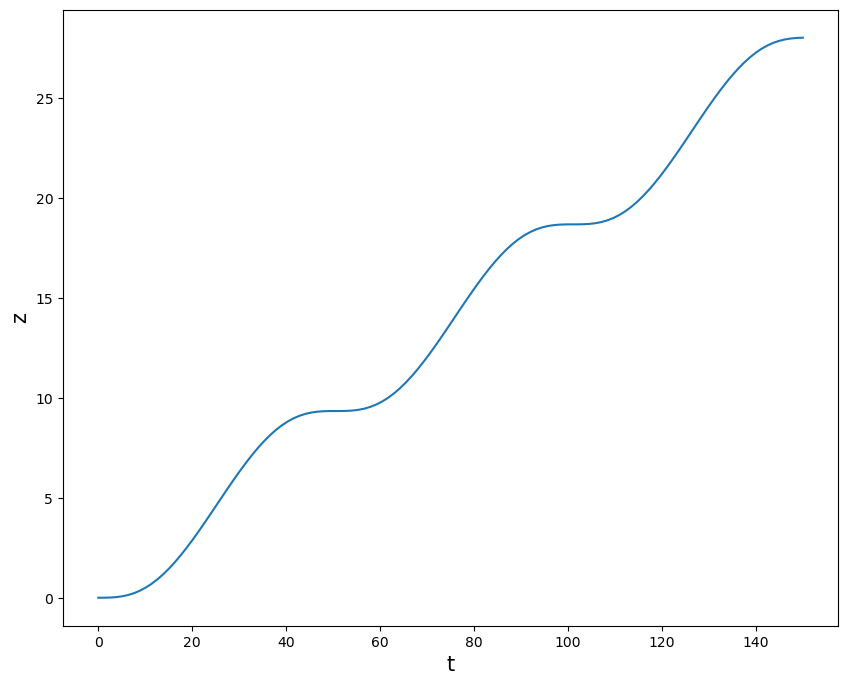

In [37]:
fig = plt.figure(figsize = (10, 8))
plt.plot(t, sol[:, 2])

plt.xlabel('t', fontsize = 15)
plt.ylabel('z', fontsize = 15)

plt.savefig('ogo5_zt.png', dpi=200)

plt.show()

C:\Users\HP_USER\AppData\Local\Temp\ipykernel_4516\4241952772.py:12: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(sol[:, 1].min(), sol[:, 1].max())


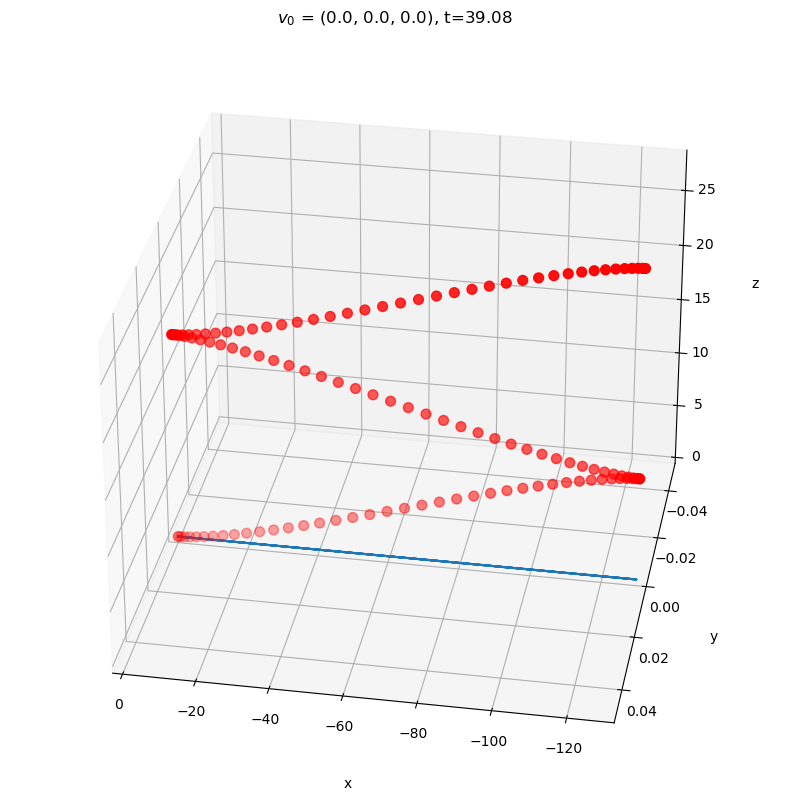

In [33]:
plt.style.use(['default'])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10, 10))

ax.plot3D(sol[:, 0], sol[:, 1], 0.)

ax.scatter(sol[:, 0], sol[:, 1], sol[:, 2], c = "r", s = 50)

ax.set_title('$v_0$ = {:}, t={:.2f}'.format(S_0[3:], t[31]))
        
ax.set_xlim(sol[:, 0].min(), sol[:, 0].max())
ax.set_ylim(sol[:, 1].min(), sol[:, 1].max())
ax.set_zlim(sol[:, 2].min(), sol[:, 2].max())

ax.set_xlabel("x", labelpad = 20)
ax.set_ylabel("y", labelpad = 20)
ax.set_zlabel("z", labelpad = 20)

ax.view_init(elev=30, azim=100)

plt.show()


In [35]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

C:\Users\HP_USER\AppData\Local\Temp\ipykernel_4516\3257975015.py:8: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(sol[:, 1].min(), sol[:, 1].max())


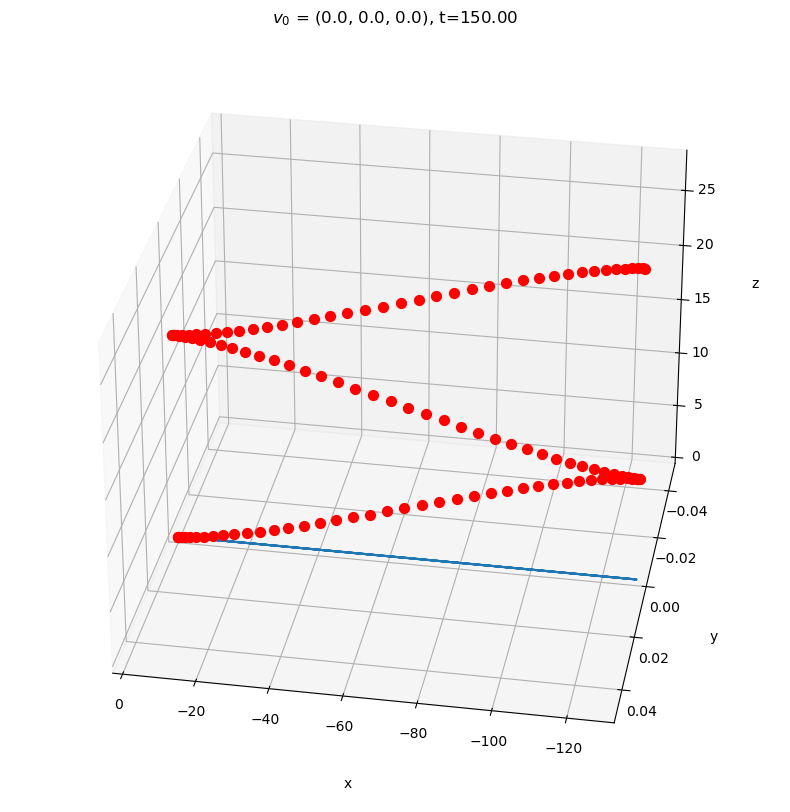

In [36]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10, 10))

ax.scatter(sol[0, 0], sol[0, 1], sol[0, 2], c = "r", s = 50)
ax.plot3D(sol[:, 0], sol[:, 1], 0.) #proiectia pe xOy
ax.set_title('t={:.2f}'.format(t[0]))
        
ax.set_xlim(sol[:, 0].min(), sol[:, 0].max())
ax.set_ylim(sol[:, 1].min(), sol[:, 1].max())
ax.set_zlim(sol[:, 2].min(), sol[:, 2].max())

ax.set_xlabel("x", labelpad = 20)
ax.set_ylabel("y", labelpad = 20)
ax.set_zlabel("z", labelpad = 20)
ax.view_init(elev=30, azim=100)

def animate(i):
    ax.set_title('$v_0$ = {:}, t={:.2f}'.format(S_0[3:], t[i]))
    ax.scatter(sol[i, 0], sol[i, 1], sol[i, 2], c = "r", s = 50)
    

    
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=50)
ani.save('ogo5.gif',writer='pillow',fps=30,dpi=100)

## Electron in HG EM field

### Symbolic section

In [1]:
import numpy as np
import sympy as smp
from sympy import hermite as H

In [2]:
x, y, z, w0, k, z0 = smp.symbols('x y z omega_0 k z_0', real = True)
m, p = smp.symbols('m p', integer = True, positive = True)
w, R = smp.symbols('omega R', cls = smp.Function)
w = w(z)
R = R(z)

In [3]:
E_x = H(m, smp.sqrt(2)*x / w)*H(p, smp.sqrt(2)*y / w)* w0/w * smp.exp(- (x**2 + y**2) / w**2) * smp.exp(smp.I*(k*z + (1 + m + p) * smp.atan2(z, z0))) * smp.exp(smp.I * k * (x**2 + y**2) / (2*R))

E_x = E_x.subs([(w, w0*smp.sqrt(1 + (z/z0)**2)), (R, z*(1 + (z0/z)**2))])

E_y = 0

E_z = smp.I/k * smp.diff(E_x, x).simplify()
      

In [4]:
iw_B_x = smp.diff(E_z, y) - smp.diff(E_y, z)

iw_B_y = -smp.diff(E_z, x) + smp.diff(E_x, z)

iw_B_z = smp.diff(E_y, x) - smp.diff(E_x, y)

In [5]:
E_x_f = smp.lambdify([m, p, z0, w0, k,  x, y, z], E_x)
E_y_f = smp.lambdify([m, p, z0, w0, k,  x, y, z], E_y)
E_z_f = smp.lambdify([m, p, z0, w0, k,  x, y, z], E_z)

iw_B_x_f = smp.lambdify([m, p, z0, w0, k,  x, y, z], iw_B_x)
iw_B_y_f = smp.lambdify([m, p, z0, w0, k,  x, y, z], iw_B_y)
iw_B_z_f = smp.lambdify([m, p, z0, w0, k,  x, y, z], iw_B_z)

In [6]:
E_x_f(1, 1, 15., 0.2, 1, 1, 2, 1)

(1.2574286723814748e-52+3.3403431525132264e-52j)

### Numerical section

$\tilde{\dot{\boldsymbol{v}}} = -\frac{E_0 e t_0}{m v_0} (\tilde{\boldsymbol{E}} + \frac{v_0}{c}\tilde{\boldsymbol{v}} \times \tilde{\boldsymbol{B}})$

$\tilde{\dot{\boldsymbol{x}}} =  \frac{v_0 t_0}{d_0} \tilde{\boldsymbol{v}}$

$q_0 = -e$

$m_0 = m_e$

$d_0 =1 \mu m$

$t_0 = 10^{-13} s$

$E_0 = 10^{8} \ V/m $

$B_0 = \frac{1}{c} E_0$

$v_0 = 10 \alpha c$

$$\tilde{\dot{v_i}} =  - K_1 (\tilde{E_i} + 10 \alpha \ \epsilon_{ijk} \tilde{v_j} \tilde{B_k} )$$, $$K_1 \approx 7.3$$

$$\tilde{\dot{x_i}} = K_2 \tilde{v_i}$$, $$K_2 \approx 5.3$$


In [12]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
c = 13.7 # v0 (zece viteze atomice) ------- viteza luminii in vid
alpha = 1/137.036
la = 0.75 #micrometru----------lungimea de unda pt rosu
w_0 = 30*la #micrometru --------- largimea fasciculului
k = 2*np.pi/la # 1/micrometru------ modulul vectorului de unda in directia z
w = c * k
z_0 = np.pi*w_0**2 / la #micrometru-------distanta_Rayleigh
K_1 = 7.3; K_2 = 5.3

In [8]:
la * w / (2*np.pi)

13.699999999999998

In [9]:
def field(t, r, m, p):
    """
    Function that returns
    (E, B) at time t at point r
    r = (x[0], x[1], x[2])
    m, p integers greater than zero
    """
    E = []; B = []
    
    E.append(E_x_f(m, p, z_0, w_0, k, r[0], r[1], r[2]))
    E.append(E_y_f(m, p, z_0, w_0, k, r[0], r[1], r[2]))
    E.append(E_z_f(m, p, z_0, w_0, k, r[0], r[1], r[2]))
    
    B.append(-1j / w * iw_B_x_f(m, p, z_0, w_0, k, r[0], r[1], r[2]))
    B.append(-1j / w * iw_B_y_f(m, p, z_0, w_0, k, r[0], r[1], r[2]))
    B.append(-1j / w * iw_B_z_f(m, p, z_0, w_0, k, r[0], r[1], r[2]))
    
    return np.nan_to_num(np.real(np.array([E, B])*np.exp(-1j*w*t)))

field(10., np.array([1, 2, 3]), 1, 1)

array([[-1.57623761e-02, -0.00000000e+00, -3.21427380e-03],
       [-8.03559741e-06,  0.00000000e+00, -1.15912263e-04]])

In [19]:
m, p = (1, 0) #indicii modului HG

E = lambda t, r : field(t, r, m, p)[0]
B = lambda t, r : field(t, r, m, p)[1]

def dSdt(t, S):
    
    x1, x2, x3, v1, v2, v3  = S
    
    return [K_2 * v1,
            K_2 * v2,
            K_2 * v3,
            -K_1 * (E(t, np.array([x1, x2, x3]))[0] + 10*alpha*(v2*B(t, np.array([x1, x2, x3]))[2] - v3*B(t, np.array([x1, x2, x3]))[1])),
            -K_1 * (E(t, np.array([x1, x2, x3]))[1] - 10*alpha*(v1*B(t, np.array([x1, x2, x3]))[2] + v3*B(t, np.array([x1, x2, x3]))[0])),
            -K_1 * (E(t, np.array([x1, x2, x3]))[2] + 10*alpha*(v1*B(t, np.array([x1, x2, x3]))[1] - v2*B(t, np.array([x1, x2, x3]))[0]))]
            
x1_0, x2_0, x3_0 = np.array([1., -5., 0.05]) #x3_0 diferit de zero 
v1_0, v2_0, v3_0 = np.array([0., 0.5, -1.])

S_0 = (x1_0, x2_0, x3_0, v1_0, v2_0, v3_0)

In [20]:
t0 = 0; tf = 3.5
t = np.linspace(t0, tf, 1024)
sol = solve_ivp(dSdt, (t0, tf), y0=S_0, method = 'Radau', t_eval=t, rtol =1e-3, atol=1e-6)

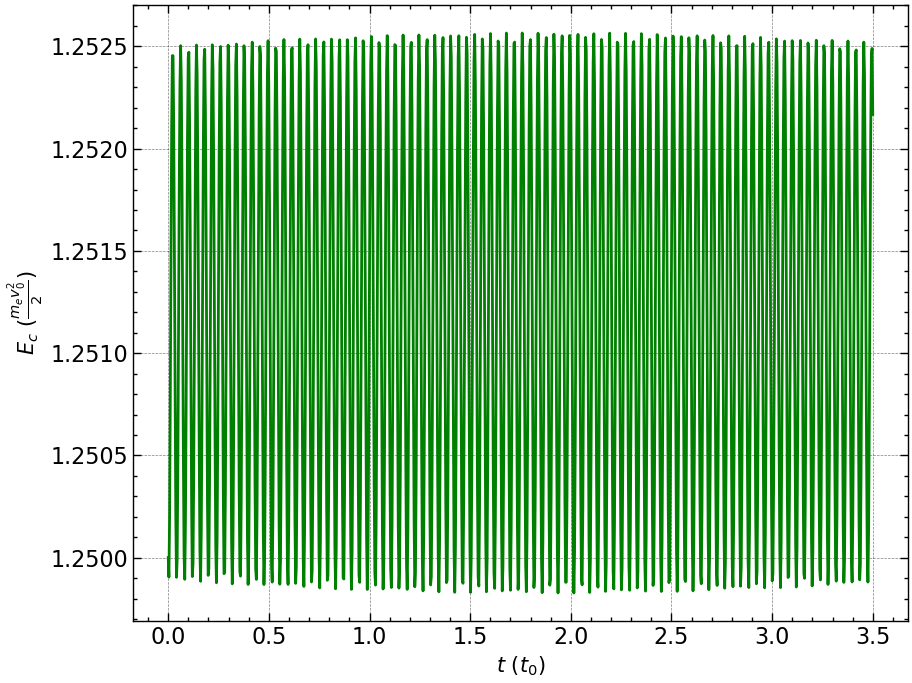

In [21]:
plt.style.use(['science', 'notebook', 'grid'])
fig, ax = plt.subplots(1, 1, figsize = (10, 8))

E_c = sol.y[3]**2 + sol.y[4]**2 + sol.y[5]**2
ax.plot(t, E_c, 'g')

ax.set_xlabel('$t \ (t_0)$', fontsize = 15)
ax.set_ylabel(r'$E_c \ (\frac{m_e v_0^2}{2}$)', fontsize = 15)

#plt.savefig('HG_E_c.png', dpi=200)
plt.show()




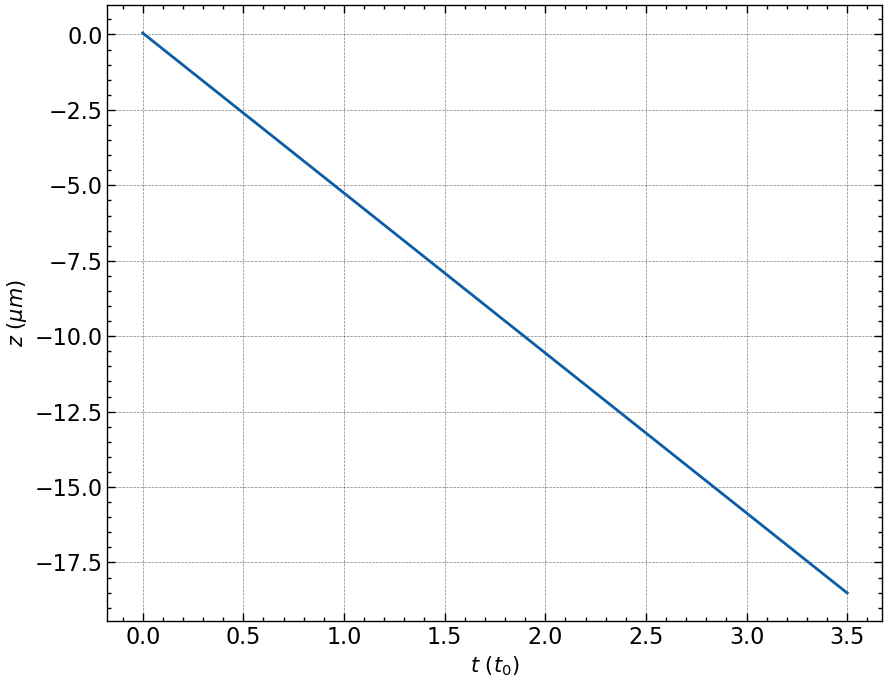

In [22]:
plt.style.use(['science', 'notebook', 'grid'])

x = sol.y[0]; y = sol.y[1]; z = sol.y[2]
fig = plt.figure(figsize = (10, 8))
plt.plot(t, sol.y[2])

plt.xlabel('$t \ (t_0)$', fontsize = 15)
plt.ylabel('$z \ (\mu m)$', fontsize = 15)

#plt.savefig('HG_zt.png', dpi=200)

plt.show()

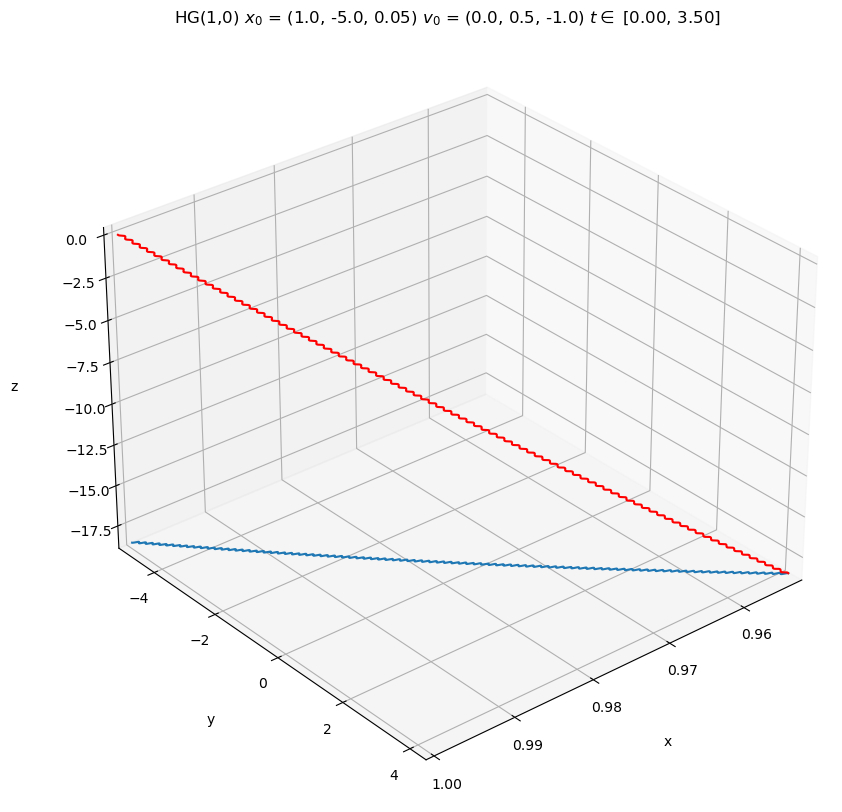

In [23]:
plt.style.use(['default'])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10, 10))

ax.plot3D(x, y, z.min())

ax.plot3D(x, y, z, "r", markersize=5)

ax.set_title('HG({:},{:}) $x_0$ = {:} $v_0$ = {:} $t \in$ [{:.2f}, {:.2f}]'.format(m, p, S_0[:3], S_0[3:], t0, tf))
        
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(z.min(), z.max())

ax.set_xlabel("x", labelpad = 20)
ax.set_ylabel("y", labelpad = 20)
ax.set_zlabel("z", labelpad = 20)

ax.view_init(elev=30, azim=50)

#plt.savefig('HG_3d.png', dpi=200)
plt.show()

In [24]:
vx = sol.y[3]; vy = sol.y[4]; vz = sol.y[5]
r = np.array([x, y, z]).T
v = np.array([vx, vy, vz]).T
L = np.cross(r, v)
Ls = np.linalg.norm(L, axis=1)

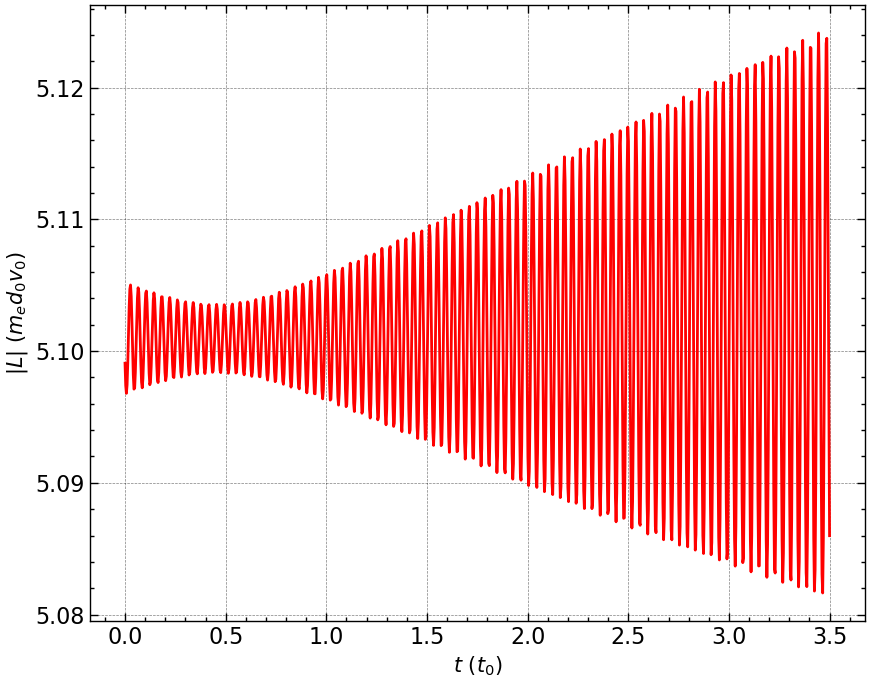

In [25]:
plt.style.use(['science', 'notebook', 'grid'])
fig, ax = plt.subplots(1, 1, figsize = (10, 8))

ax.plot(t, Ls, 'r')

ax.set_xlabel('$t \ (t_0)$', fontsize = 15)
ax.set_ylabel(r'$|L| \ (m_e d_0 v_0)$', fontsize = 15)

#plt.savefig('HG_L.png', dpi=200)
plt.show()

In [16]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

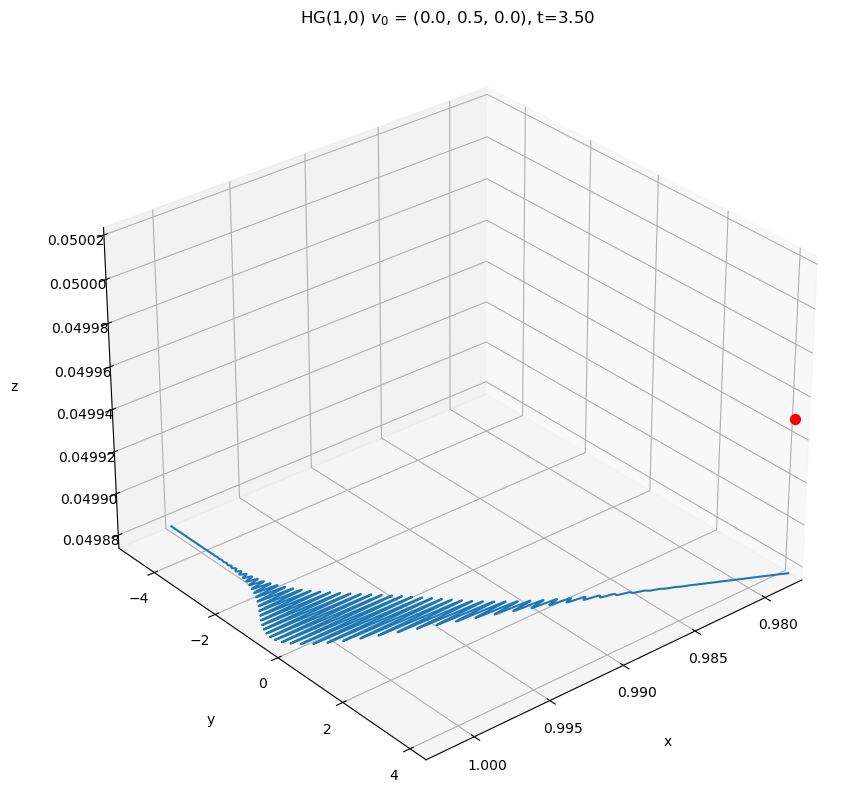

In [32]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10, 10))

#ax.scatter(x[0], y[0], z[0], c = "r", s = 50)
#ax.plot3D(x, y, z.min()) #proiectia pe xy
#ax.set_title('t={:.2f}'.format(t[0]))
        
#ax.set_xlim(x.min(), x.max())
#ax.set_ylim(y.min(), y.max())
#ax.set_zlim(z.min(), z.max())

#ax.set_xlabel("x", labelpad = 20)
#ax.set_ylabel("y", labelpad = 20)
#ax.set_zlabel("z", labelpad = 20)
#ax.view_init(elev=30, azim=50)

def animate(i):
    ax.clear()
    
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())
    
    ax.set_xlabel("x", labelpad = 20)
    ax.set_ylabel("y", labelpad = 20)
    ax.set_zlabel("z", labelpad = 20)
    ax.view_init(elev=30, azim=50)
    
    ax.set_title('HG({:},{:}) $v_0$ = {:}, t={:.2f}'.format(m, p, S_0[3:], t[i]))
    ax.plot3D(x, y, z.min()) #proiectia pe xy
    ax.scatter(x[i], y[i], z[i], c = "r", s = 50)
    
    
    

    
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=50)
ani.save('HG_anim.gif',writer='pillow',fps=30,dpi=100)

## Electron in LG EM field

### Symbolic section

In [1]:
import numpy as np
import sympy as smp
from sympy import assoc_laguerre as L

In [2]:
r, fi, x, y, z, w0, k, z0 = smp.symbols(' rho phi x y z omega_0 k z_0', real = True)
p, m = smp.symbols('p m', integer = True)
w, R = smp.symbols(' omega R', cls = smp.Function)
w = w(z)
R = R(z)

In [3]:
E_x = w0/w * (smp.sqrt(2)*r/w)**smp.Abs(m) * L(p, smp.Abs(m), 2*r**2 / w**2) * smp.exp(- r**2 / w**2) * \
smp.exp(smp.I*(k*z + (1 + smp.Abs(m) + 2*p)) * smp.atan2(z, z0)) * smp.exp(smp.I*m*fi) * smp.exp(smp.I * k * r**2 / (2*R))

E_x = E_x.subs([(w, w0*smp.sqrt(1 + (z/z0)**2)), (R, z*(1 + (z0/z)**2)), (r, smp.sqrt(x**2 + y**2)), (fi, smp.atan2(y, x))])

E_y = 0

E_z = smp.I/k * smp.diff(E_x, x).simplify()

In [4]:
iw_B_x = smp.diff(E_z, y) - smp.diff(E_y, z)

iw_B_y = -smp.diff(E_z, x) + smp.diff(E_x, z)

iw_B_z = smp.diff(E_y, x) - smp.diff(E_x, y)

In [5]:
E_x_f = smp.lambdify([p, m, z0, w0, k,  x, y, z], E_x)
E_y_f = smp.lambdify([p, m, z0, w0, k,  x, y, z], E_y)
E_z_f = smp.lambdify([p, m, z0, w0, k,  x, y, z], E_z)

iw_B_x_f = smp.lambdify([p, m, z0, w0, k,  x, y, z], iw_B_x)
iw_B_y_f = smp.lambdify([p, m, z0, w0, k,  x, y, z], iw_B_y)
iw_B_z_f = smp.lambdify([p, m, z0, w0, k,  x, y, z], iw_B_z)

In [6]:
iw_B_z_f(0, 0, 15., 5., 2., 0.01, 5., 0.1)

(0.14715229188192847+0.0011772271640979166j)

### Numerical section

$\tilde{\dot{\boldsymbol{v}}} = -\frac{E_0 e t_0}{m v_0} (\tilde{\boldsymbol{E}} + \frac{v_0}{c}\tilde{\boldsymbol{v}} \times \tilde{\boldsymbol{B}})$

$\tilde{\dot{\boldsymbol{x}}} =  \frac{v_0 t_0}{d_0} \tilde{\boldsymbol{v}}$

$d_0 = 1 \mu m$

$t_0 = 10^{-13} s$

$E_0 = 10^{8} \ V/m $

$v_0 = 10 \ \alpha c $ 

$q = -e = -1$

$m = m_e = 1$ 

$$\tilde{\dot{v_i}} =  - K_1 (\tilde{E_i} + 10 \alpha \ \epsilon_{ijk} \tilde{v_j} \tilde{B_k} )$$ 
$$K_1 \approx 7.3$$

$$\tilde{\dot{x_i}} = K_2 \tilde{v_i}$$ 
$$K_2 \approx 5.3$$

In [7]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [8]:
c = 13.7 # v0 (zece viteze atomice) ------- viteza luminii in vid
alpha = 1/137.036
la = 0.75 #micrometru----------lungimea de unda pt rosu
w_0 = 2*la #micrometru --------- largimea fasciculului
k = 2*np.pi/la # 1/micrometru------ modulul vectorului de unda in directia z
w = c * k
z_0 = np.pi*w_0**2 / la #micrometru-------distanta_Rayleigh
K_1 = 7.3; K_2 = 5.3

In [9]:
def field(t, r, m, p):
    """
    Function that returns
    (E, B) at time t at point r
    r = (x[0], x[1], x[2])
    m, p integers, p >= than zero
    """
    E = []; B = []
    
    E.append(E_x_f(m, p, z_0, w_0, k, r[0], r[1], r[2]))
    E.append(E_y_f(m, p, z_0, w_0, k, r[0], r[1], r[2]))
    E.append(E_z_f(m, p, z_0, w_0, k, r[0], r[1], r[2]))
    
    B.append(-1j / w * iw_B_x_f(m, p, z_0, w_0, k, r[0], r[1], r[2]))
    B.append(-1j / w * iw_B_y_f(m, p, z_0, w_0, k, r[0], r[1], r[2]))
    B.append(-1j / w * iw_B_z_f(m, p, z_0, w_0, k, r[0], r[1], r[2]))
    
    return np.nan_to_num(np.real(np.array([E, B])*np.exp(-1j*w*t)))

field(10., np.array([0.05, 0.05, 0.05]), 2, 0)

array([[-5.18876037e-01, -0.00000000e+00,  2.24646234e-02],
       [-1.38598935e-05, -5.19853363e-03,  1.63975353e-03]])

In [10]:
p, m = (1, 1) #indicii modului LG

E = lambda t, r : field(t, r, m, p)[0]
B = lambda t, r : field(t, r, m, p)[1]

def dSdt(t, S):
    
    x1, x2, x3, v1, v2, v3  = S
    
    return [K_2 * v1,
            K_2 * v2,
            K_2 * v3,
            -K_1 * (E(t, np.array([x1, x2, x3]))[0] + 10*alpha*(v2*B(t, np.array([x1, x2, x3]))[2] - v3*B(t, np.array([x1, x2, x3]))[1])),
            -K_1 * (E(t, np.array([x1, x2, x3]))[1] - 10*alpha*(v1*B(t, np.array([x1, x2, x3]))[2] + v3*B(t, np.array([x1, x2, x3]))[0])),
            -K_1 * (E(t, np.array([x1, x2, x3]))[2] + 10*alpha*(v1*B(t, np.array([x1, x2, x3]))[1] - v2*B(t, np.array([x1, x2, x3]))[0]))]
            
x1_0, x2_0, x3_0 = np.array([0.5, 0., 3.3]) #z diferit de zero 
v1_0, v2_0, v3_0 = np.array([0., 0., -0.5])

S_0 = (x1_0, x2_0, x3_0, v1_0, v2_0, v3_0)

In [17]:
t0 = 0; tf = 4.5
t = np.linspace(t0, tf, 1024)
sol = solve_ivp(dSdt, (t0, tf), y0=S_0, method = 'Radau', t_eval=t, rtol =1e-3, atol=1e-6)

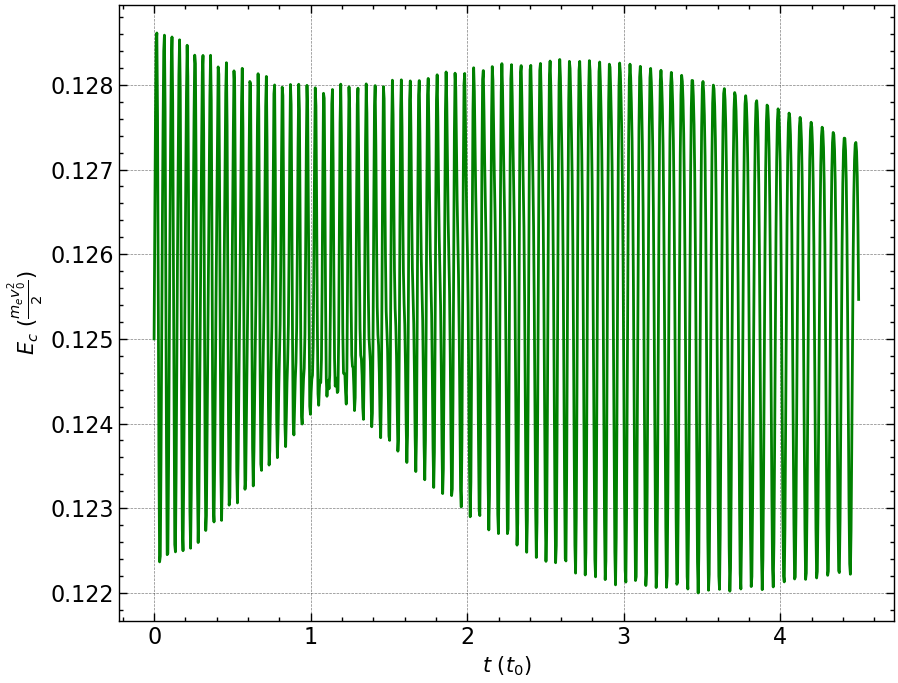

In [18]:
plt.style.use(['science', 'notebook', 'grid'])
fig, ax = plt.subplots(1, 1, figsize = (10, 8))

E_c = (sol.y[3]**2 + sol.y[4]**2 + sol.y[5]**2) / 2
ax.plot(t, E_c, 'g')

ax.set_xlabel('$t \ (t_0)$', fontsize = 15)
ax.set_ylabel(r'$E_c \ (\frac{m_e v_0^2}{2}$)', fontsize = 15)

#plt.savefig('LG_Ec.png', dpi=200)
plt.show()

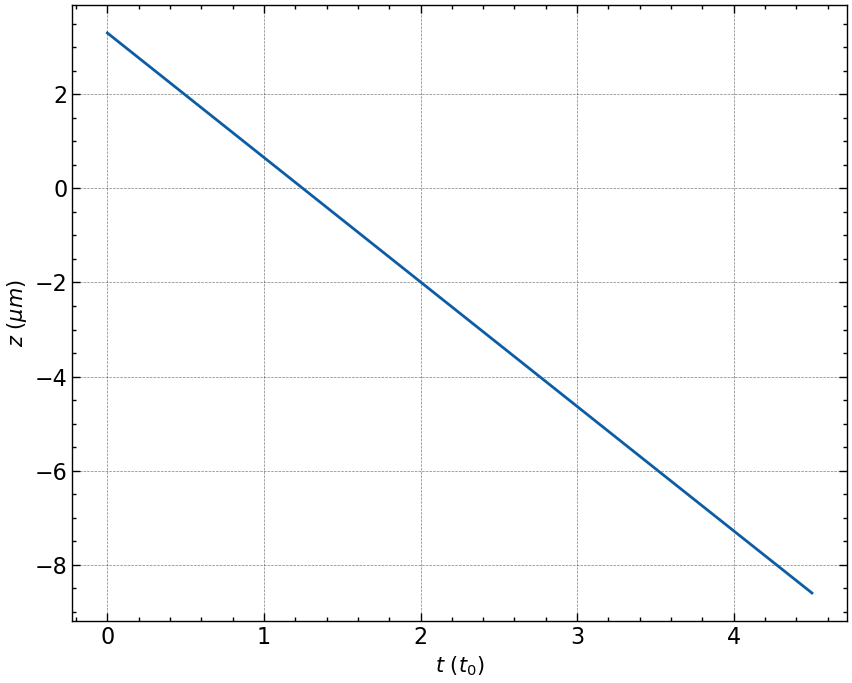

In [19]:
plt.style.use(['science', 'notebook', 'grid'])

x = sol.y[0]; y = sol.y[1]; z = sol.y[2]
fig = plt.figure(figsize = (10, 8))
plt.plot(t, sol.y[2])

plt.xlabel('$t \ (t_0)$', fontsize = 15)
plt.ylabel('$z \ (\mu m)$', fontsize = 15)

#plt.savefig('LG_zt.png', dpi=200)

plt.show()

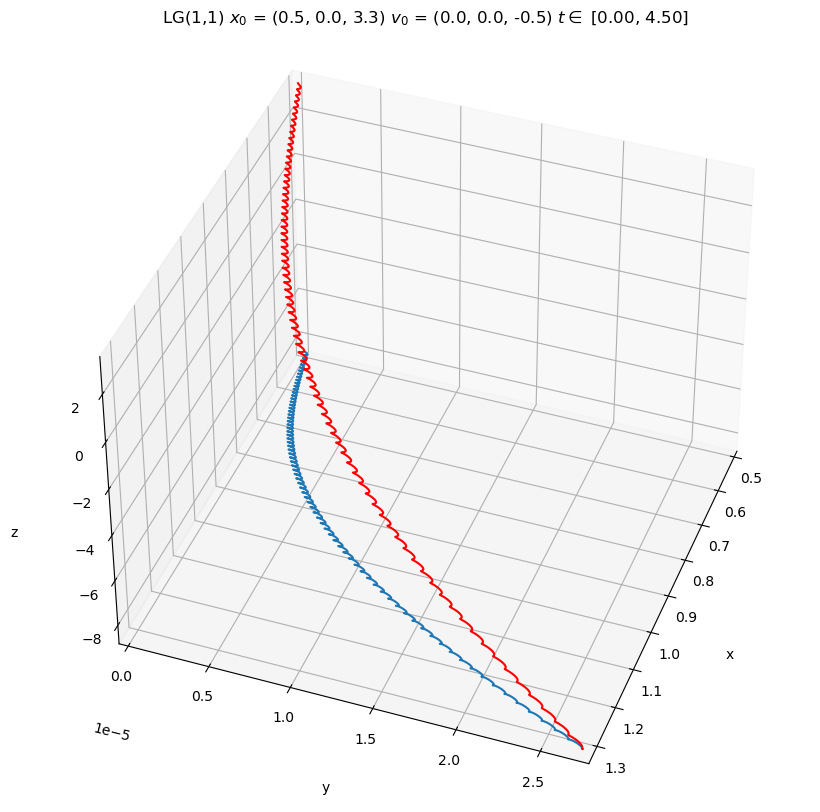

In [20]:
plt.style.use(['default'])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10, 10))

ax.plot3D(x, y, z.min())

ax.plot(x, y, z, 'r', markersize=5)

ax.set_title('LG({:},{:}) $x_0$ = {:} $v_0$ = {:} $t \in$ [{:.2f}, {:.2f}]'.format(p, m, S_0[:3], S_0[3:], t0, tf))
        
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(z.min(), z.max())

ax.set_xlabel("x", labelpad = 20)
ax.set_ylabel("y", labelpad = 20)
ax.set_zlabel("z", labelpad = 20)

ax.view_init(elev=40, azim=20)

#plt.savefig('LG_3d.png', dpi=200)
plt.show()

In [21]:
vx = sol.y[3]; vy = sol.y[4]; vz = sol.y[5]
r = np.array([x, y, z]).T
v = np.array([vx, vy, vz]).T
L = np.cross(r, v)
Ls = np.linalg.norm(L, axis=1)

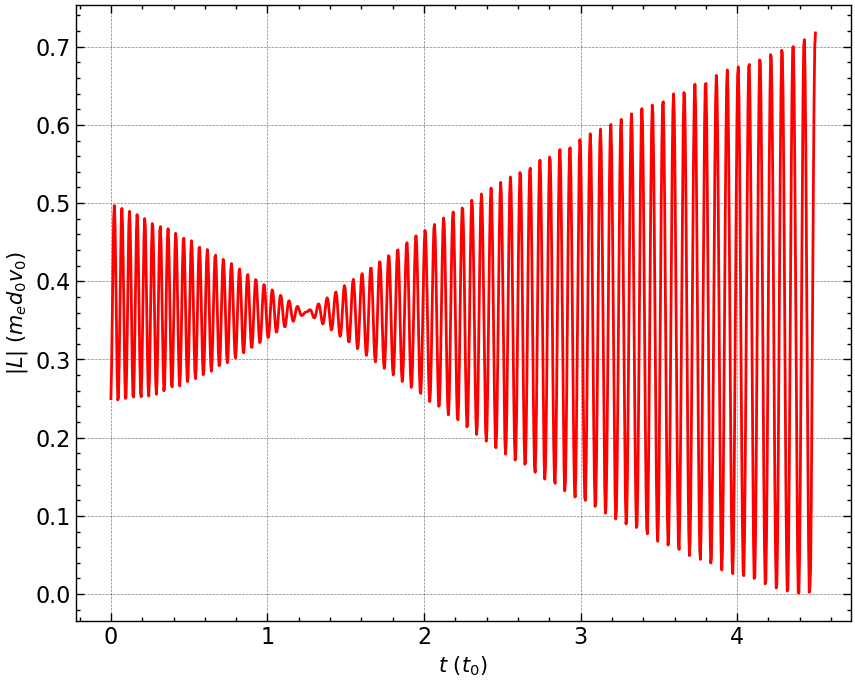

In [22]:
plt.style.use(['science', 'notebook', 'grid'])
fig, ax = plt.subplots(1, 1, figsize = (10, 8))

ax.plot(t, Ls, 'r')

ax.set_xlabel('$t \ (t_0)$', fontsize = 15)
ax.set_ylabel(r'$|L| \ (m_e d_0 v_0)$', fontsize = 15)

#plt.savefig('LG_L.png', dpi=200)
plt.show()

In [17]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

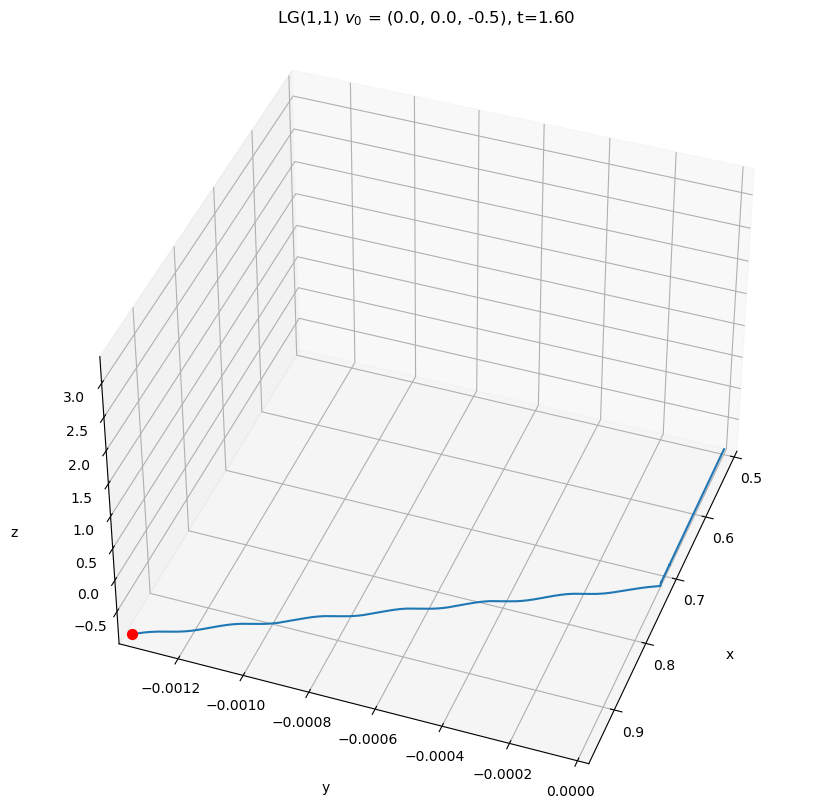

In [20]:
plt.style.use(['default'])
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10, 10))

def animate(i):
    ax.clear()
    
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())
    
    ax.set_xlabel("x", labelpad = 20)
    ax.set_ylabel("y", labelpad = 20)
    ax.set_zlabel("z", labelpad = 20)
    ax.view_init(elev=40, azim=20)
    
    ax.set_title('LG({:},{:}) $v_0$ = {:}, t={:.2f}'.format(p, m, S_0[3:], t[i]))
    ax.plot3D(x, y, z.min()) #proiectia pe xy
    ax.scatter(x[i], y[i], z[i], c = "r", s = 50)
    
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=50)
ani.save('LG_anim.gif',writer='pillow',fps=16,dpi=100)